# Tornado trends in Midwestern states
Load the file `noaa_data_cleaned.csv` (from the "Data cleaning" notebook):

In [1]:
import pandas as pd
df = pd.read_csv('noaa_data_cleaned.csv')
df = df.drop(['Unnamed: 0'], axis=1)

To see if removing small tornadoes from the record really eliminate the long-term increasing trend, drop all records with 'Strength' = 0:

In [2]:
import numpy as np
print(np.sort(df['Strength'].unique()))
df = df[df['Strength'] > 0]
print(np.sort(df['Strength'].unique()))

[0 1 2 3 4 5]
[1 2 3 4 5]


Now focus on the 12 Midwestern states (using the Census Bureau's definition at https://en.wikipedia.org/wiki/Midwestern_United_States):

In [3]:
g = df.groupby(['Year', 'State'])
df = g.count().unstack().droplevel(0, axis=1)
df = df.fillna(0)
midwestern_states = [
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan',
    'Minnesota', 'Missouri', 'Nebraska', 'North Dakota',
    'Ohio', 'South Dakota', 'Wisconsin'
]
df = df[midwestern_states]
df.head()

State,Illinois,Indiana,Iowa,Kansas,Michigan,Minnesota,Missouri,Nebraska,North Dakota,Ohio,South Dakota,Wisconsin
Year,,,,,,,,,,,,
1950,11.0,2.0,4.0,27.0,0.0,1.0,6.0,5.0,2.0,3.0,1.0,5.0
1951,5.0,5.0,5.0,40.0,8.0,4.0,6.0,6.0,1.0,3.0,2.0,7.0
1952,4.0,2.0,5.0,15.0,0.0,11.0,11.0,10.0,9.0,2.0,1.0,1.0
1953,4.0,8.0,32.0,22.0,16.0,8.0,5.0,31.0,8.0,8.0,10.0,9.0
1954,9.0,28.0,19.0,46.0,9.0,7.0,37.0,16.0,2.0,7.0,16.0,12.0


Compute the 10-year rolling average for each state:

In [4]:
df = df.rolling(10).mean().dropna()
df.head()

State,Illinois,Indiana,Iowa,Kansas,Michigan,Minnesota,Missouri,Nebraska,North Dakota,Ohio,South Dakota,Wisconsin
Year,,,,,,,,,,,,
1959,19.5,14.7,11.9,33.8,9.1,8.0,22.3,21.0,5.0,5.8,6.9,9.7
1960,21.9,15.4,13.8,34.8,9.6,8.5,25.3,23.8,5.4,6.1,7.3,9.8
1961,25.0,18.2,14.7,33.6,9.2,8.8,28.7,23.8,5.3,7.2,8.3,9.9
1962,25.6,19.3,15.3,36.2,9.7,8.5,29.1,26.0,4.9,7.3,11.4,10.5
1963,26.6,21.4,13.4,35.5,8.6,8.3,30.0,24.2,4.2,7.9,10.8,10.5


Let's visualize the state-by-state rolling averages:

<IPython.core.display.Javascript object>


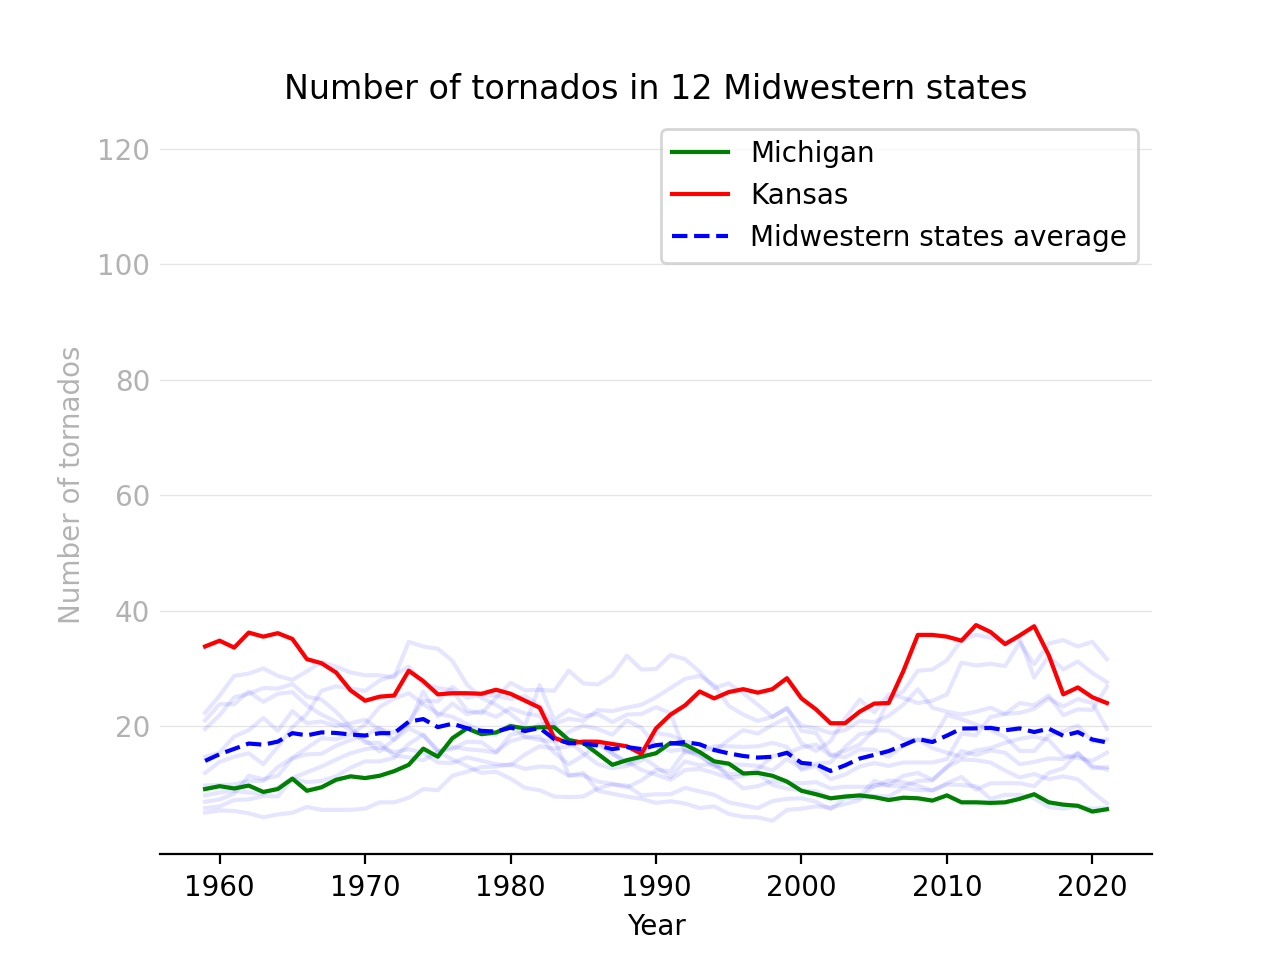

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig = plt.figure()
yticks = range(20, 121, 20)
for y in yticks:
    plt.axhline(y, linewidth=0.5, color='k', alpha=0.1)
plt.plot(df.index, df, color='b', alpha=0.1)
plt.plot(df.index, df['Michigan'], label='Michigan', color='g')
plt.plot(df.index, df['Kansas'], label='Kansas', color='r')
plt.plot(df.index, df.mean(axis=1), 'b--', label='Midwestern states average', alpha=1)
ax = plt.gca()
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of tornados', alpha=0.3)
for text in ax.get_yticklabels():
    text.set_alpha(0.3)
plt.title('Number of tornados in 12 Midwestern states')
ax.set_yticks(yticks)
ax.tick_params(axis='y', length=0)
for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
plt.show()

Indeed, after removing tornados of strength 0 from the data, there is no clear evidence of increasing number of tornadoes.